# Load Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Loading Data

In [6]:
df = pd.read_csv('/kaggle/input/cancer-details/data.csv')

### Cleaning Data

In [7]:
# Data cleaning
df.drop('id', axis=1, inplace=True)
df.drop('Unnamed: 32', axis=1, inplace=True)

In [8]:
# Mapping diagnosis to binary values
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [9]:
# Define the list of selected features
features_mean = list(df.columns[1:11])


In [10]:
# Extract features and target variable
X = df[features_mean]  # Features
y = df['diagnosis']  # Target variable


In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Regression Model

In [12]:
# Create and train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Predictions

In [13]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [14]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

### Data Visualization

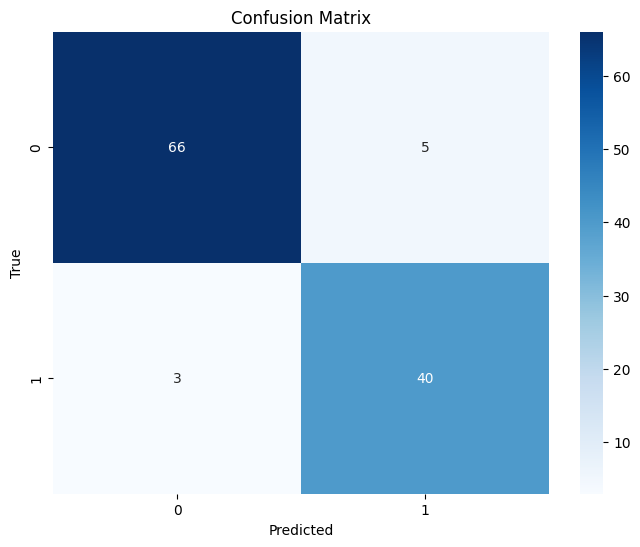

In [15]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [16]:
# Print the classification report
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9298245614035088
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94        71
           1       0.89      0.93      0.91        43

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



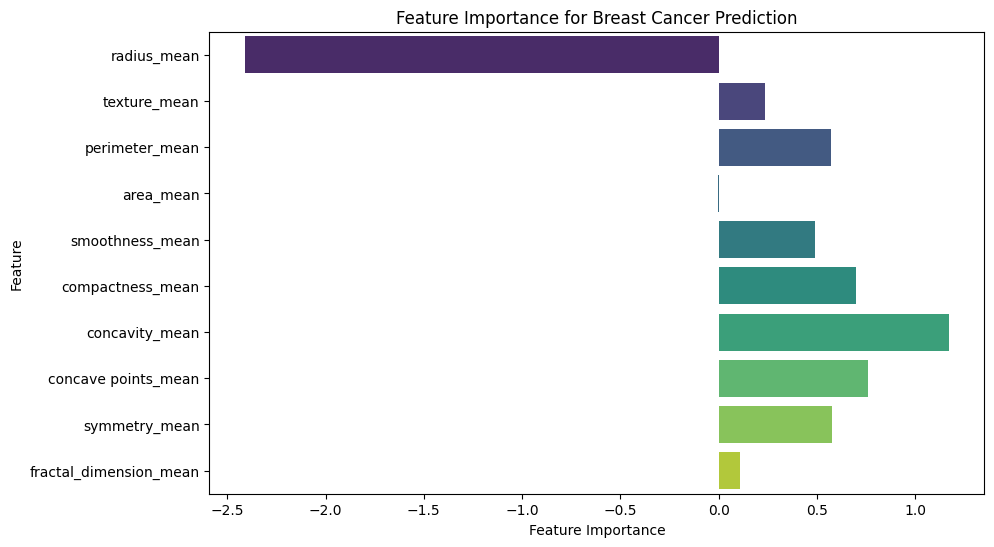

In [17]:
# Plot a bar chart of feature importances
if hasattr(model, 'coef_'):
    feature_importance = model.coef_[0]
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importance, y=features_mean, palette="viridis")
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance for Breast Cancer Prediction')
    plt.show()